In [79]:
import os

import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial I/Datasets Trabajos/fighter_details.csv',delimiter=",")
data[['height', 'weight', 'reach']] = data[['height', 'weight', 'reach']].replace('', np.nan)
data[['height', 'weight', 'reach']] = data[['height', 'weight', 'reach']].fillna(0.0)
X = data['height']
y = data['weight']
m = y.size

In [82]:
print(X)

0       182.88
1       182.88
2       175.26
3       180.34
4       180.34
         ...  
2601    185.42
2602    177.80
2603    167.64
2604    182.88
2605    185.42
Name: height, Length: 2606, dtype: float64


In [83]:
print(y)

0        70.31
1        77.11
2        92.99
3        83.91
4        70.31
         ...  
2601     92.99
2602     77.11
2603     56.70
2604     90.26
2605    115.67
Name: weight, Length: 2606, dtype: float64


# **Trazar los datos**

In [84]:
def plotData(x, y):

    fig = pyplot.figure()

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Peso')
    pyplot.xlabel('Altura')


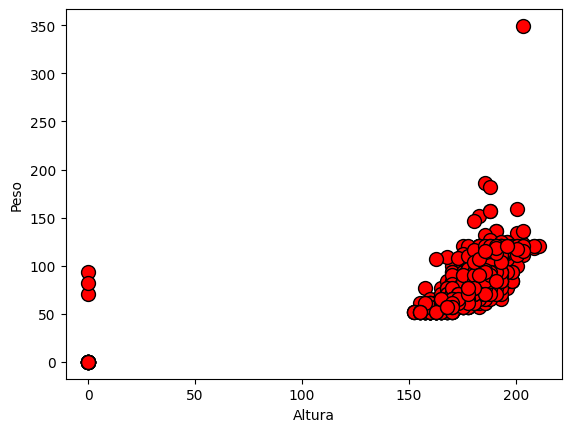

In [85]:
plotData(X, y)

# **Descenso por el gradiente**

In [86]:
X = np.stack([np.ones(m), X], axis=1)

In [87]:
print(X)

[[  1.   182.88]
 [  1.   182.88]
 [  1.   175.26]
 ...
 [  1.   167.64]
 [  1.   182.88]
 [  1.   185.42]]


**Calculo del Costo J**

In [88]:
def calcularCosto(X, y, theta):

    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [89]:
def gradientDescent(X, y, theta, alpha, num_iters):

    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # J_historial
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Inicializacion de Datos

In [90]:
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 50000
alpha = 1e-8

#1e-9

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 0.0022, 0.4321
[np.float64(3069.4681673319565), np.float64(3067.6036826110376), np.float64(3065.7403765191802), np.float64(3063.8782483113155), np.float64(3062.017297242849), np.float64(3060.157522569654), np.float64(3058.2989235480754), np.float64(3056.4414994349295), np.float64(3054.5852494874994), np.float64(3052.7301729635406), np.float64(3050.876269121276), np.float64(3049.0235372193974), np.float64(3047.171976517067), np.float64(3045.321586273913), np.float64(3043.472365750034), np.float64(3041.624314205994), np.float64(3039.7774309028255), np.float64(3037.9317151020286), np.float64(3036.08716606557), np.float64(3034.243783055882), np.float64(3032.4015653358647), np.float64(3030.5605121688827), np.float64(3028.7206228187665), np.float64(3026.8818965498135), np.float64(3025.0443326267846), np.float64(3023.2079303149058), np.float64(3021.372688879867), np.float64(3019.538607587825), np.float64(3017.705685705396), np.float64(3015.873922499663

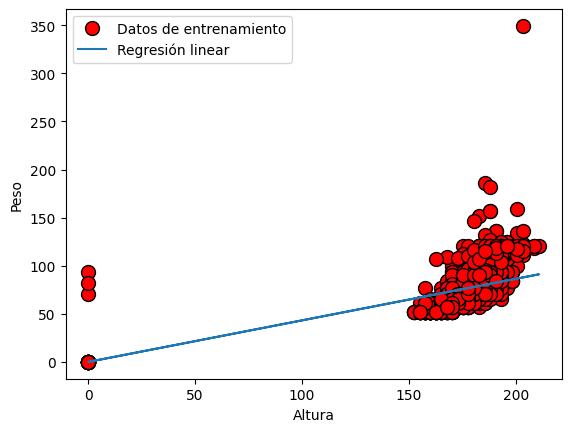

In [91]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Prediccion

In [92]:
predict1 = np.dot([1, 170], theta)
print('Para una altura = 170, se predice un peso de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 180], theta)
print('Para una altura = 180, se predice un peso de {:.2f}\n'.format(predict2))

Para una altura = 170, se predice un peso de 73.46

Para una altura = 180, se predice un peso de 77.78



# **VISUALIZAR J**

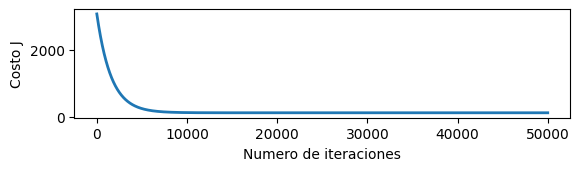

In [93]:
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass